<a href="https://colab.research.google.com/github/leetim13/AI-Search-Algo-Sokoban-Game/blob/master/audio_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install pretty_midi
# ! pip install stumpy

In [ ]:
import pandas as pd
import numpy as np
from os import path
import os
# import pretty_midi
# from pretty_midi import note_number_to_name
import librosa
import soundfile as sf
import math
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# stumpy
%matplotlib inline

import stumpy
import pandas as pd
import numpy as np
from IPython.display import IFrame
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [121]:
from scipy.io.wavfile import read
samplerate1, wav1 = read('/content/drive/MyDrive/Audio_data/StarWars3.wav')

samplerate2, wav2 = read('/content/drive/MyDrive/Audio_data/StarWars60.wav')
samplerate2, wav2

In [105]:
print(wav1.size, wav2.size)

wav2 = wav2[0:100000]

66150 1323000


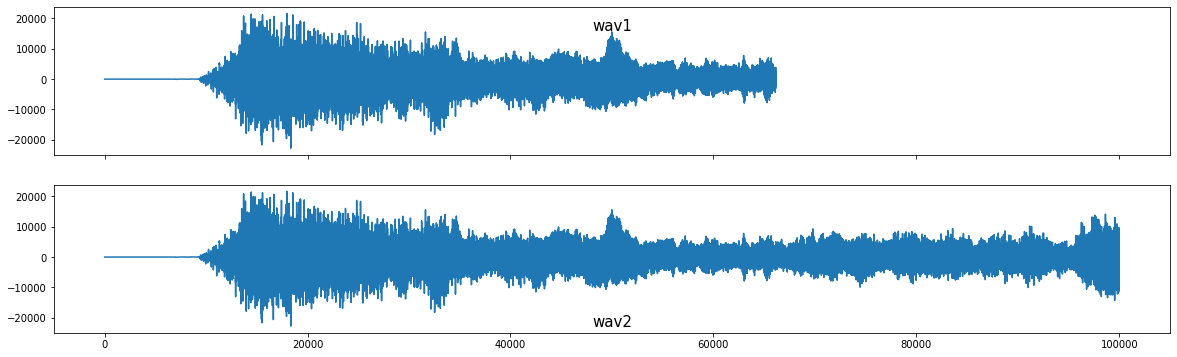

In [106]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].set_title('wav1', fontsize=15, y=0.8)
axs[1].set_title('wav2',  fontsize=15, y=0)
axs[0].plot(wav1)
axs[1].plot(wav2)

plt.show()

# Experimenting when wav1 perfectly intersects with wav2

In [112]:
wav2_rand = np.random.randint(-2, 2, 100000) * 5000
wav2_rand.size

100000

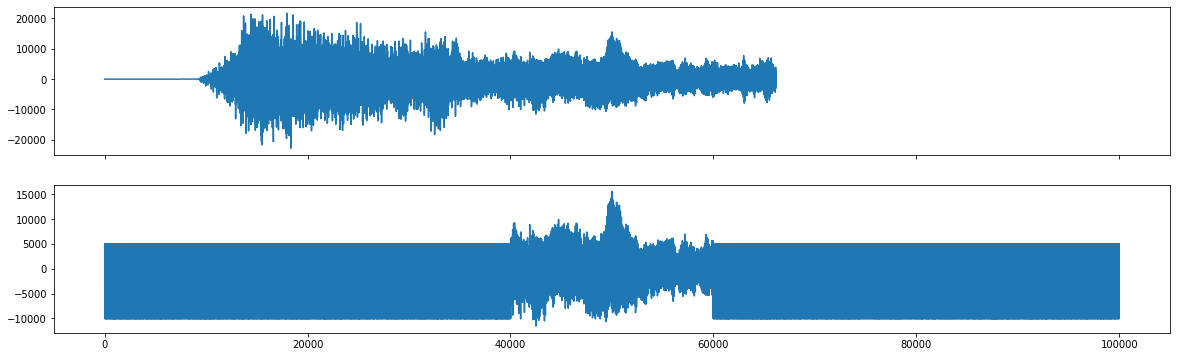

In [126]:
# choose a subset of wav2 [40000:60000] where it perfectly intersects with wav1 and fill the rest of wav2 with random numbers
wav2_rand = np.random.randint(-2, 2, 100000) * 5000
wav2_rand[40000:60000] = wav2[40000:60000]

fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(wav1)
axs[1].plot(wav2_rand)
plt.show()

# set this as new wav2
wav2 = wav2_rand

In [127]:
m = 20000
# m = 20
wav1_mp = stumpy.gpu_stump(T_A = wav1.astype(float),
                        m = m,
                        T_B = wav2.astype(float),
                        ignore_trivial = False)

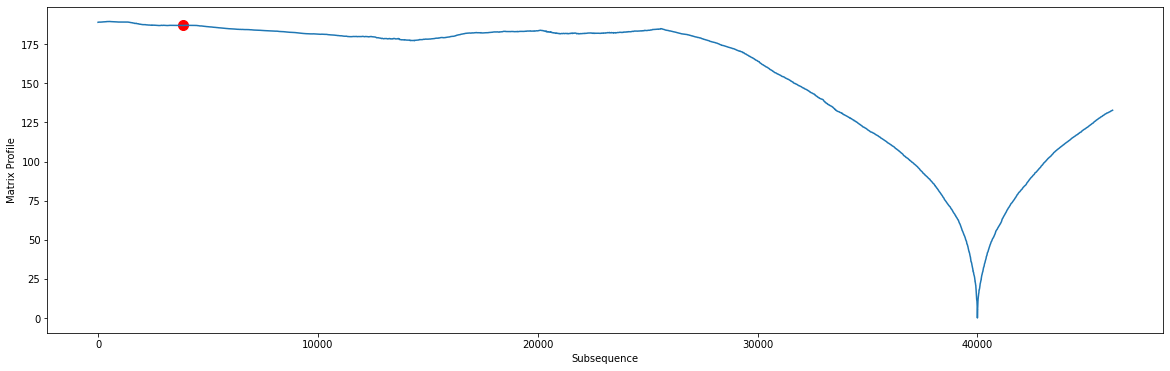

In [128]:
wav1_motif_index = mp[:, 0].argmin()

plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')
plt.scatter(wav1_motif_index,
               wav1_mp[wav1_motif_index, 0],
               c='red',
               s=100)
plt.plot(wav1_mp[:,0])
plt.show()

In [129]:
wav1_motif_index = wav1_mp[:, 0].argmin()
print(f'The motif is located at index {wav1_motif_index} of "wav1"')

wav2_motif_index = wav1_mp[wav1_motif_index, 1]
print(f'The motif is located at index {wav2_motif_index} of "wav2"')

The motif is located at index 40000 of "wav1"
The motif is located at index 40000 of "wav2"


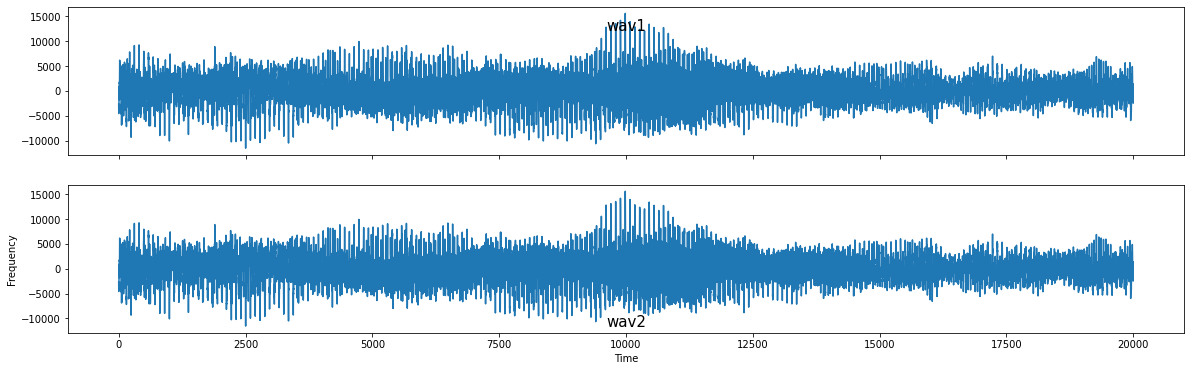

In [130]:
# stumpy's matrix profile successfully finds the motif with window size 20000 at index 40000 for both wav's
fig, axs = plt.subplots(2, sharex=True)
axs[0].set_title('wav1', fontsize=15, y=0.8)
axs[1].set_title('wav2',  fontsize=15, y=0)
plt.xlabel('Time')
plt.ylabel('Frequency')
axs[0].plot(wav1[wav1_motif_index : wav1_motif_index + m], label='wav1')
axs[1].plot(wav2[wav2_motif_index:wav2_motif_index+m], label='wav2')
plt.show()

# Experimenting with 2 unrelated wav's

m = 1000 (window size)

In [145]:
samplerate1, wav1 = read('/content/drive/MyDrive/Audio_data/2013/ORIG-MIDI_01_7_6_13_Group__MID--AUDIO_01_R1_2013_wav--1.wav')

samplerate2, wav2 = read('/content/drive/MyDrive/Audio_data/2013/ORIG-MIDI_01_7_6_13_Group__MID--AUDIO_01_R1_2013_wav--2.wav')
samplerate2, wav2, wav2.size

(44100, array([[-34,   3],
        [-31,   1],
        [-29,   1],
        ...,
        [  9,  -4],
        [  6,  -6],
        [  4,  -8]], dtype=int16), 29261522)

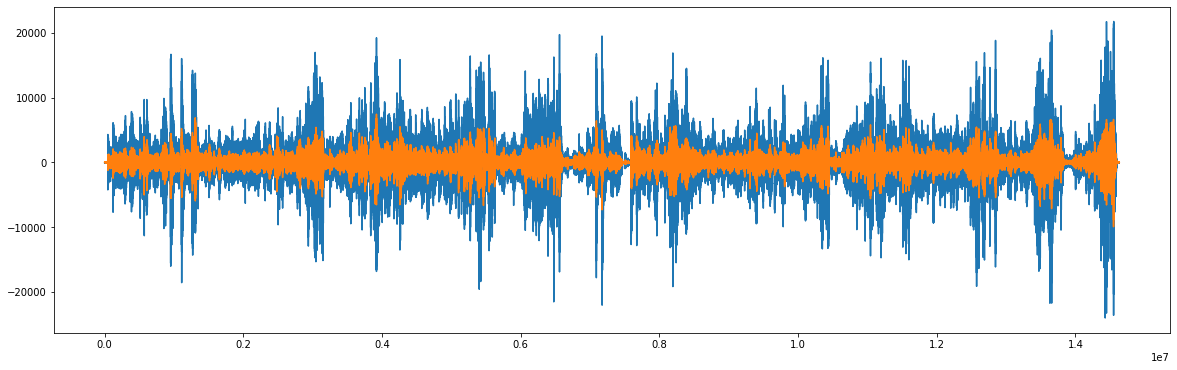

In [143]:
# plot wav2 
plt.plot(wav2)

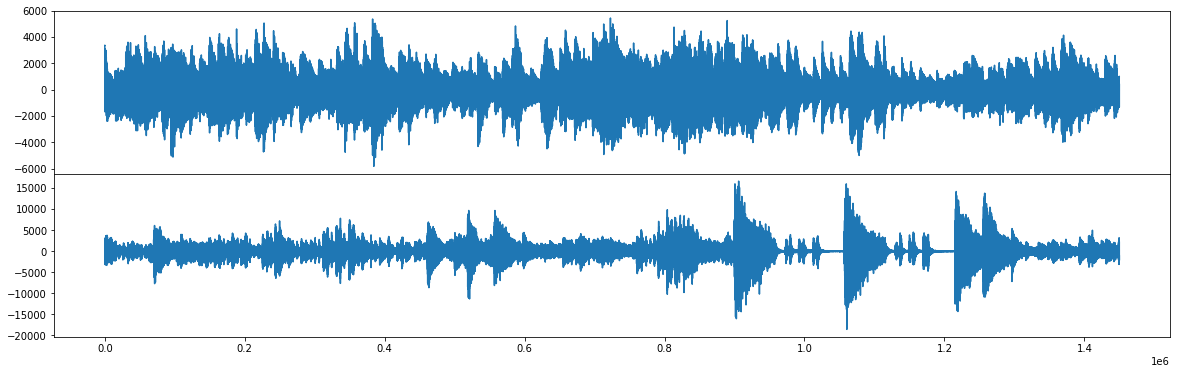

In [146]:
# experiment with just a single channel for both audio files (if input audio has more than one channels)
wav1 = np.take(wav1, 0, axis=1).astype(float) #stumpy requires float type
wav2 = np.take(wav2, 0, axis=1).astype(float)

# subset both files to [50000:1500000] first for experimetnal purposes
wav1 = wav1[50000:1500000]
wav2 = wav2[50000:1500000]

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(wav1)
axs[1].plot(wav2)

In [148]:
m = 1000
wav1_mp = stumpy.gpu_stump(T_A = wav1.astype(float),
                        m = m,
                        T_B = wav2.astype(float),
                        ignore_trivial = False)
# took ~18min

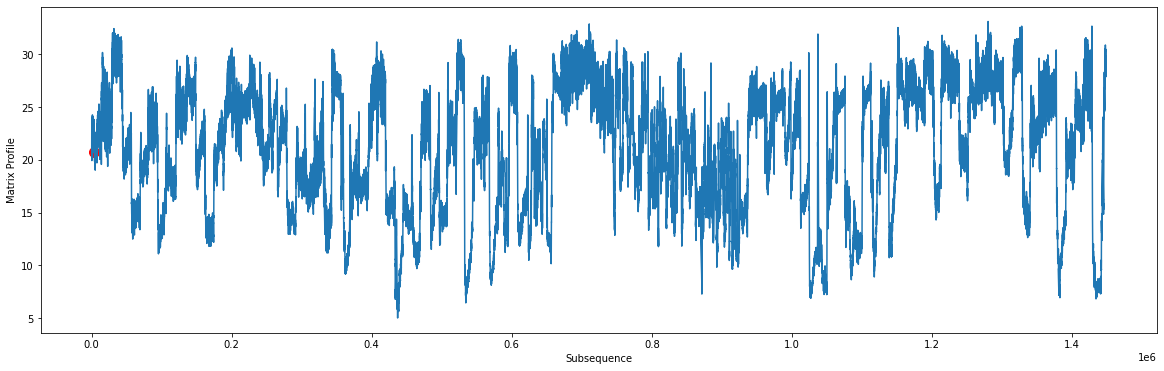

In [149]:
wav1_motif_index = mp[:, 0].argmin()

plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')
plt.scatter(wav1_motif_index,
               wav1_mp[wav1_motif_index, 0],
               c='red',
               s=100)
plt.plot(wav1_mp[:,0])
plt.show()

In [150]:
wav1_motif_index = wav1_mp[:, 0].argmin()
print(f'The motif is located at index {wav1_motif_index} of "wav1"')

wav2_motif_index = wav1_mp[wav1_motif_index, 1]
print(f'The motif is located at index {wav2_motif_index} of "wav2"')

The motif is located at index 436981 of "wav1"
The motif is located at index 764018 of "wav2"


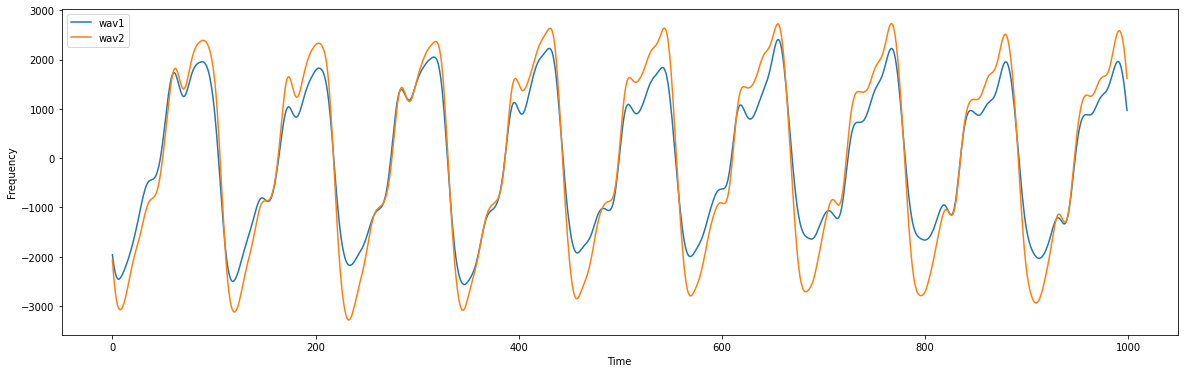

In [153]:
# plot the most common motif for the two wav's with m=1000
plt.plot(wav1[wav1_motif_index : wav1_motif_index + m], label='wav1')
plt.plot(wav2[wav2_motif_index:wav2_motif_index+m], label='wav2')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# fig, axs = plt.subplots(2, sharex=True)
# axs[0].set_title('wav1', fontsize=15, y=0.8)
# axs[1].set_title('wav2',  fontsize=15, y=0)
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# axs[0].plot(wav1[wav1_motif_index : wav1_motif_index + m], label='wav1')
# axs[1].plot(wav2[wav2_motif_index:wav2_motif_index+m], label='wav2')
# plt.show()

# m=10000


In [154]:
m = 10000
wav1_mp = stumpy.gpu_stump(T_A = wav1.astype(float),
                        m = m,
                        T_B = wav2.astype(float),
                        ignore_trivial = False)
# took ~18min

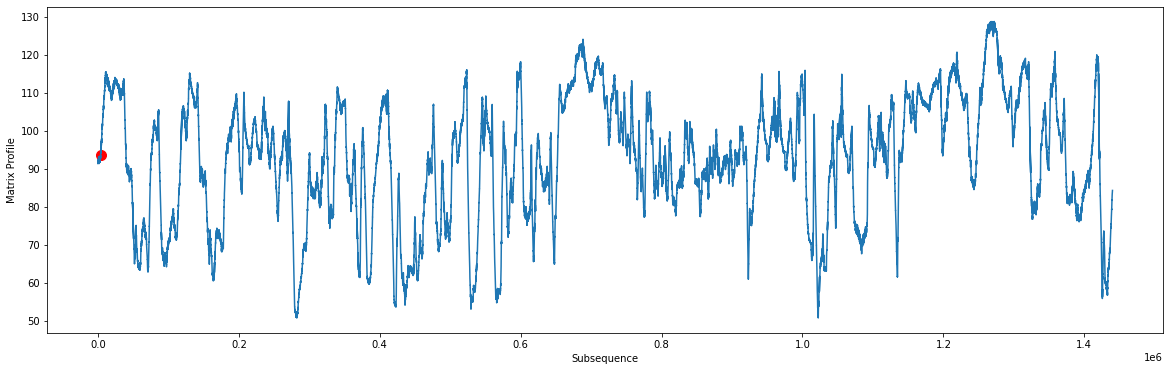

In [155]:
wav1_motif_index = mp[:, 0].argmin()

plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')
plt.scatter(wav1_motif_index,
               wav1_mp[wav1_motif_index, 0],
               c='red',
               s=100)
plt.plot(wav1_mp[:,0])
plt.show()

In [156]:
wav1_motif_index = wav1_mp[:, 0].argmin()
print(f'The motif is located at index {wav1_motif_index} of "wav1"')

wav2_motif_index = wav1_mp[wav1_motif_index, 1]
print(f'The motif is located at index {wav2_motif_index} of "wav2"')

The motif is located at index 1022396 of "wav1"
The motif is located at index 365094 of "wav2"


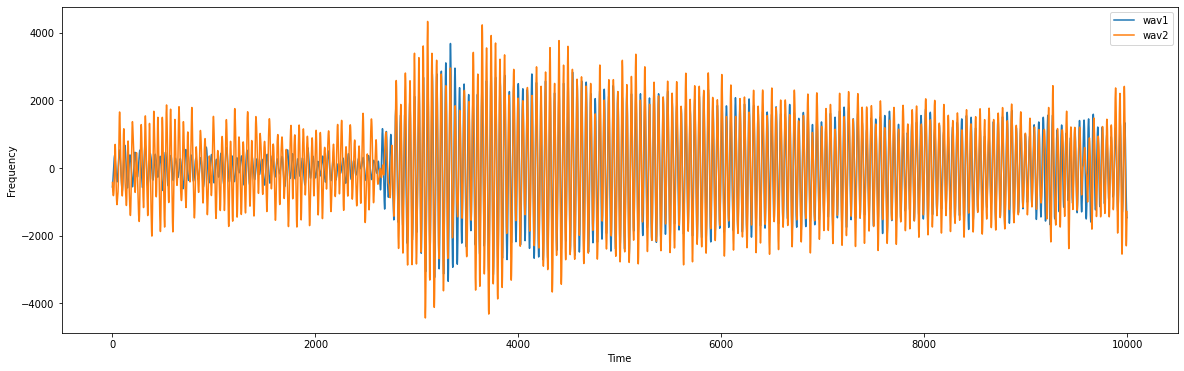

In [157]:
plt.plot(wav1[wav1_motif_index : wav1_motif_index + m], label='wav1')
plt.plot(wav2[wav2_motif_index:wav2_motif_index+m], label='wav2')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()


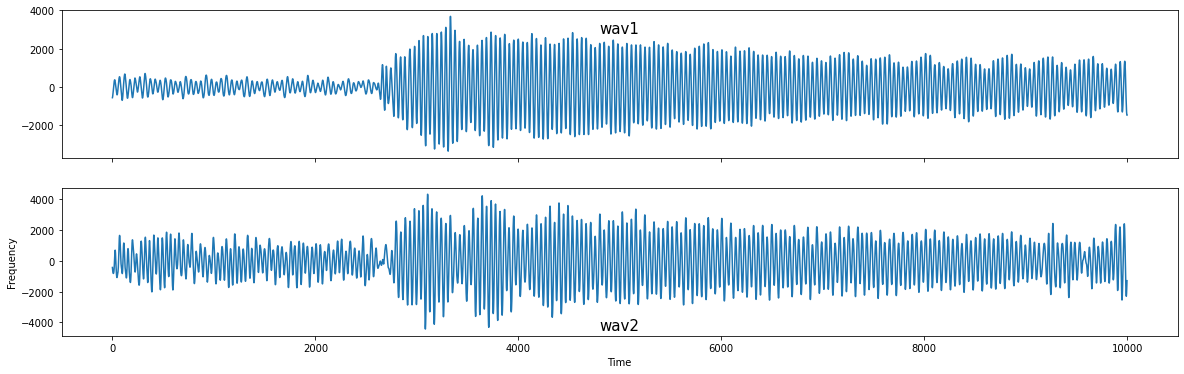

In [159]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].set_title('wav1', fontsize=15, y=0.8)
axs[1].set_title('wav2',  fontsize=15, y=0)
plt.xlabel('Time')
plt.ylabel('Frequency')
axs[0].plot(wav1[wav1_motif_index : wav1_motif_index + m], label='wav1')
axs[1].plot(wav2[wav2_motif_index:wav2_motif_index+m], label='wav2')
plt.show()

# m=5000


In [160]:
m = 5000
wav1_mp = stumpy.gpu_stump(T_A = wav1.astype(float),
                        m = m,
                        T_B = wav2.astype(float),
                        ignore_trivial = False)
# took ~15min

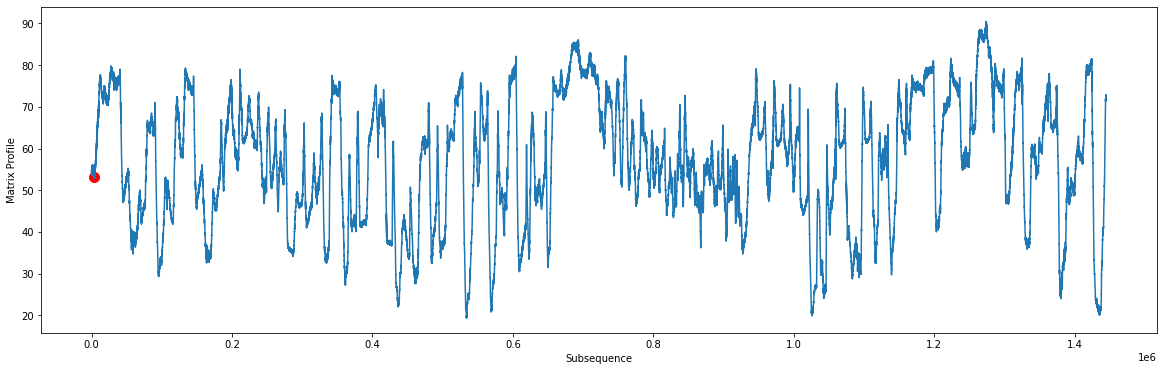

In [161]:
wav1_motif_index = mp[:, 0].argmin()

plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')
plt.scatter(wav1_motif_index,
               wav1_mp[wav1_motif_index, 0],
               c='red',
               s=100)
plt.plot(wav1_mp[:,0])
plt.show()

In [162]:
wav1_motif_index = wav1_mp[:, 0].argmin()
print(f'The motif is located at index {wav1_motif_index} of "wav1"')

wav2_motif_index = wav1_mp[wav1_motif_index, 1]
print(f'The motif is located at index {wav2_motif_index} of "wav2"')

The motif is located at index 534017 of "wav1"
The motif is located at index 761081 of "wav2"


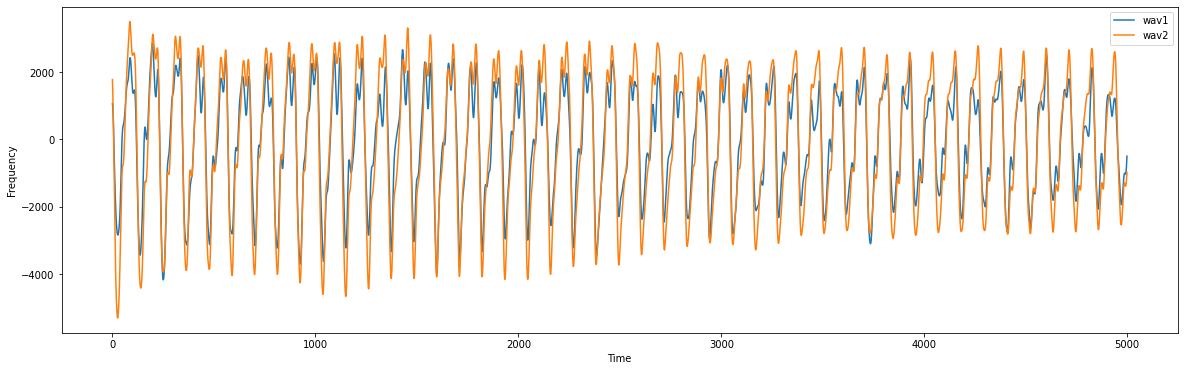

In [163]:
plt.plot(wav1[wav1_motif_index : wav1_motif_index + m], label='wav1')
plt.plot(wav2[wav2_motif_index:wav2_motif_index+m], label='wav2')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()


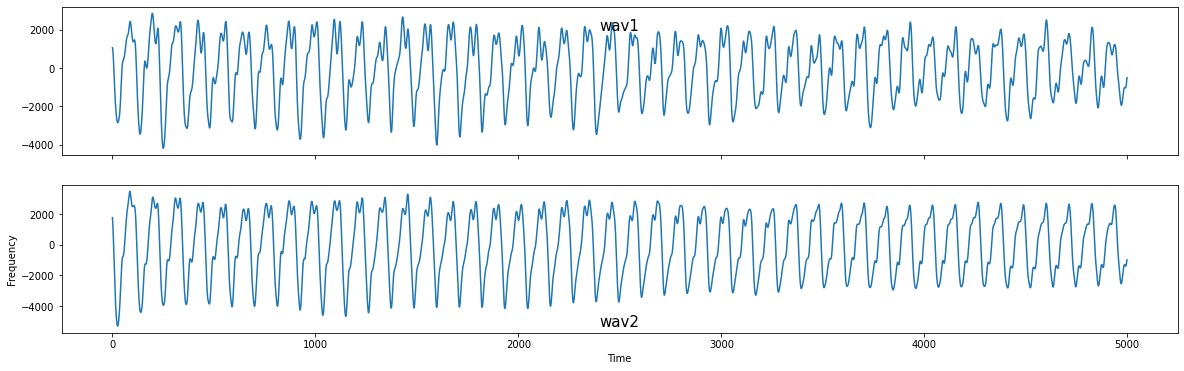

In [164]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].set_title('wav1', fontsize=15, y=0.8)
axs[1].set_title('wav2',  fontsize=15, y=0)
plt.xlabel('Time')
plt.ylabel('Frequency')
axs[0].plot(wav1[wav1_motif_index : wav1_motif_index + m], label='wav1')
axs[1].plot(wav2[wav2_motif_index:wav2_motif_index+m], label='wav2')
plt.show()